<h1>Tarea</h1>
<h3>Optimización y Pronóstico en Estrategias de Inversión Macro Cuantitativa mediante Análisis de Series Temporales</h3>

<h1>Contexto</h1>

Las estrategias de inversión macro cuantitativa se basan en el análisis exhaustivo de datos macroeconómicos y financieros a gran escala para informar decisiones de inversión. Utilizan modelos matemáticos y algoritmos para identificar patrones y oportunidades en los mercados financieros, centrándose en factores como tasas de interés, inflación y políticas gubernamentales. Estas estrategias forman parte de la inversión cuantitativa y buscan aprovechar las tendencias y desequilibrios en los mercados para obtener rendimientos positivos.

Sin embargo, históricamente, la información cuantamental ha sido difícil de manejar debido a formatos desordenados, sellos de tiempo faltantes y errores en los datos. En respuesta, aplicamos modelos de regresión de panel a conjuntos de datos macro-cuantitativos, utilizando técnicas estadísticas para analizar relaciones entre múltiples variables a lo largo del tiempo.

En nuestro análisis, nos concentramos en la aplicación de diversos modelos de forecasting a conjuntos de datos macro-cuantitativos, que abarcan indicadores clave para una variedad de áreas monetarias, desde el dólar australiano hasta el rand sudafricano. Este enfoque detallado nos permite explorar las dinámicas de cada mercado y detectar tendencias y patrones comunes, fundamentales para nuestras estrategias de inversión y toma de decisiones.

<h1>Asignación</h1>

Después de revisar el cuaderno titulado "Optimización y Pronóstico en Estrategias de Inversión Macro Cuantitativa mediante Análisis de Series Temporales", tu tarea es replicar el estudio utilizando tres monedas diferentes a las del estudio original. Puedes elegir entre cualquiera de las 21 monedas restantes disponibles en el conjunto de datos. Esta amplia selección te brinda la oportunidad de explorar la dinámica de diferentes mercados monetarios y evaluar la efectividad de las estrategias de inversión en distintos contextos económicos y geográficos.

Una vez que hayas seleccionado las tres monedas adicionales para tu estudio, deberás seguir los pasos detallados en el cuaderno de tarea para llevar a cabo el análisis y la optimización de las estrategias de inversión. Esto incluye la recolección y preparación de datos, la aplicación de técnicas de análisis de series temporales y la optimización de parámetros utilizando modelos matemáticos y algoritmos adecuados.

Al replicar el estudio con nuevas monedas, tendrás la oportunidad de profundizar en tu comprensión de las estrategias de inversión macro cuantitativa y explorar cómo se aplican en diferentes contextos de mercado. Además, podrás comparar los resultados obtenidos con los del estudio original y evaluar la robustez y la generalización de las estrategias en una variedad de situaciones. Este proceso te permitirá adquirir experiencia práctica en el análisis de datos financieros y fortalecer tus habilidades en el campo de la inversión cuantitativa.

<h2>Código en Python</h2>

En esta sección, es fundamental cargar las diferentes bibliotecas que se utilizarán en el estudio para garantizar un análisis efectivo y eficiente de los datos. A continuación, se proporciona un ejemplo de cómo podrías cargar estas bibliotecas en Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np



Después, procedemos a cargar los datos utilizando la biblioteca Pandas. Puedes descargar los datos desde el aula virtual o el repositorio de <a href='https://github.com/victormlgh/BigDataAplicadaNegociosV2/blob/main/Semana1/JPMaQS_Quantamental_Indicators.csv'>Github</a>, dependiendo de tu preferencia. 

In [2]:
df = pd.read_csv(fr'C:\Users\xavir\OneDrive\Escritorio\datos/JPMaQS_Quantamental_Indicators.csv')


Después de cargar los datos, es importante verificar su calidad y realizar cualquier limpieza necesaria para garantizar la precisión de nuestro análisis. Aquí tienes algunos pasos comunes que podríamos realizar para verificar y limpiar los datos:

Verificar la estructura de los datos: Revisar la forma del DataFrame, el tipo de datos de cada columna y la presencia de valores faltantes.

Manejo de valores faltantes: Decidir cómo manejar los valores faltantes, ya sea eliminándolos, imputándolos con algún valor, o utilizando técnicas más avanzadas como el imputado mediante modelos.

Eliminar duplicados: Verificar y eliminar filas duplicadas en caso de que existan.

Corrección de tipos de datos: Convertir los tipos de datos según sea necesario para el análisis.

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

Antes de proceder con el análisis, es crucial confirmar que las monedas seleccionadas tengan el mismo rango de tiempo en los datos disponibles. Esto es fundamental para garantizar la comparabilidad y la coherencia en nuestro estudio. 

In [ ]:
currency = df.groupby('cid').agg({'real_date': ['min','max']})

Debes revisar la sección de "Indicadores Quantamental" del notebook original para comprender las categorías del conjunto de datos.

En una exploración inicial, deseamos hacer un pairplot y un heatmap de las siguientes variables: value, grading, eop_lag y mop_lag.

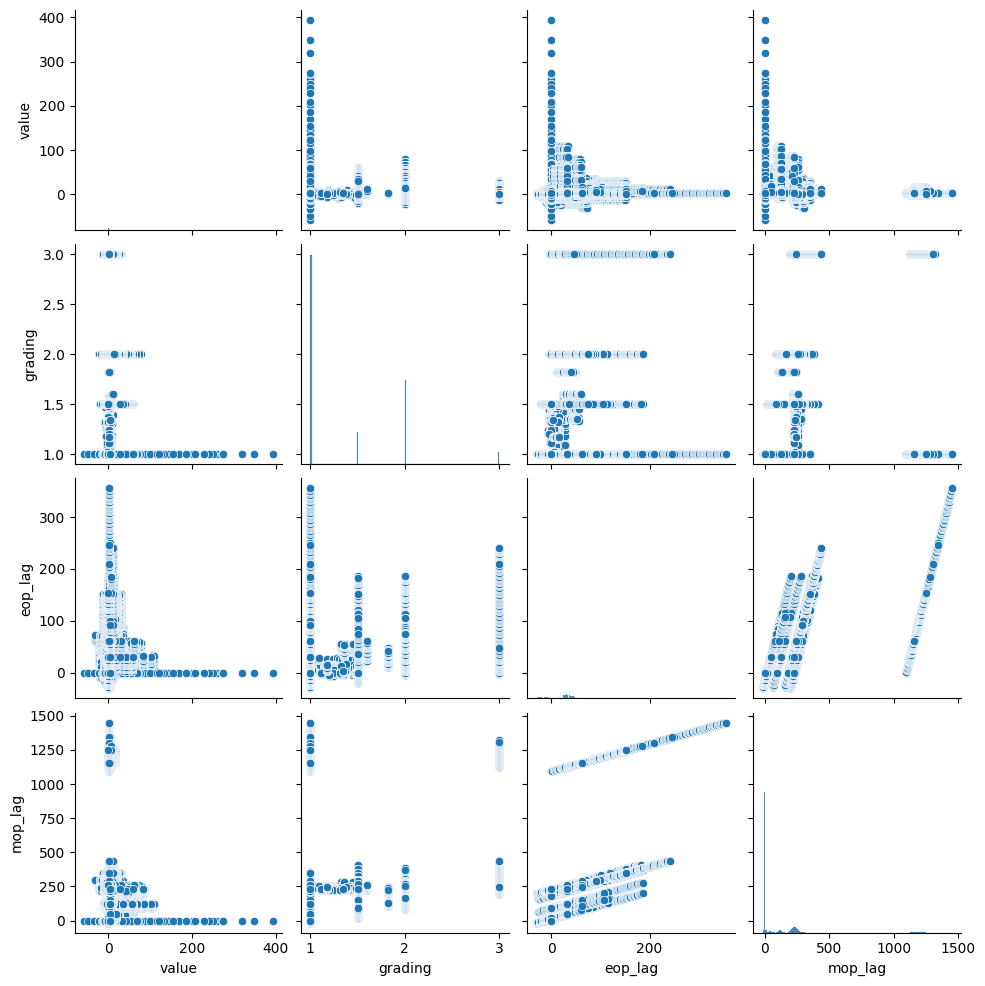

In [5]:
sns.pairplot(df[['value', 'grading','eop_lag', 'mop_lag']])
plt.show()

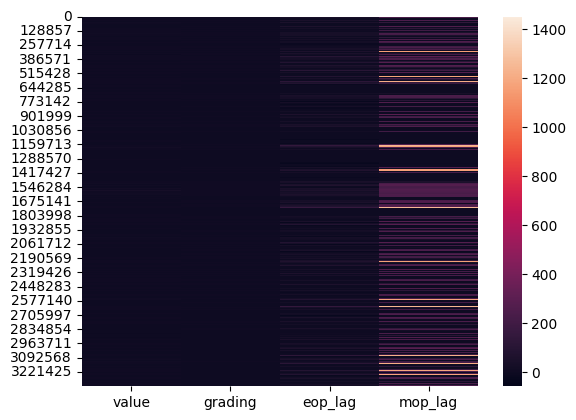

In [6]:
sns.heatmap(df[['value', 'grading','eop_lag', 'mop_lag']])
plt.show()

<h1>Análisis exploratorio de datos</h1>

Resulta útil añadir una columna de teletipo como una concatenación de cid y xcat. Esto acorta el código para referencias a series temporales individuales.

In [20]:
df['ticker'] = df['cid'] + "_" + df["xcat"]
df['real_date'] = pd.to_datetime(df['real_date'], errors='coerce')

Nos gustaría mostrar un histograma que represente las rentabilidades futuras del índice bursátil para cada moneda seleccionada en tu investigación.

Por favor, explicar lo que puedes interpretar del gráfico.

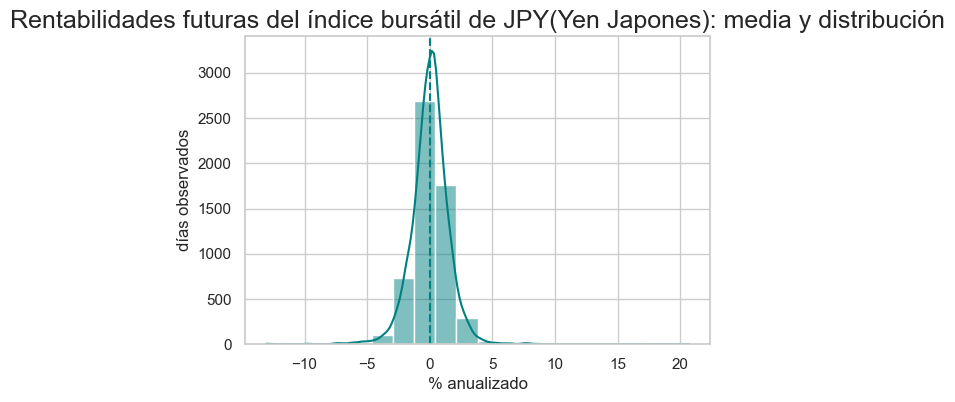

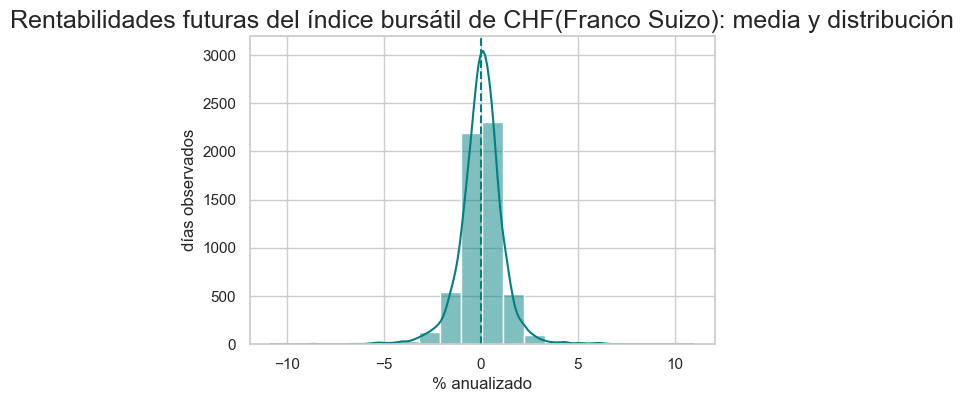

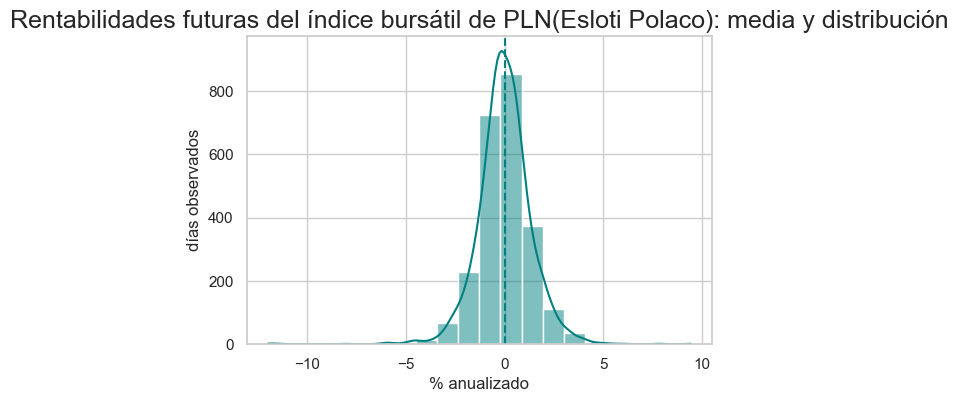

In [21]:
dfw = df.pivot_table(index='real_date', columns='ticker', values='value').replace(0, np.nan)  # llevar df a formato ancho
var = 'JPY_EQXR_NSA'

col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.histplot(x = var, data=dfw, bins=20, kde=True, color=col)  # histograma con número de contenedor personalizado y superposición de kde
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  # añadir línea vertical para la media

plt.title('Rentabilidades futuras del índice bursátil de JPY(Yen Japones): media y distribución', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('días observados', fontsize=12)
plt.show()

dfw = df.pivot_table(index='real_date', columns='ticker', values='value').replace(0, np.nan)  # llevar df a formato ancho
var = 'CHF_EQXR_NSA'

col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.histplot(x = var, data=dfw, bins=20, kde=True, color=col)  # histograma con número de contenedor personalizado y superposición de kde
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  # añadir línea vertical para la media

plt.title('Rentabilidades futuras del índice bursátil de CHF(Franco Suizo): media y distribución', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('días observados', fontsize=12)
plt.show()

dfw = df.pivot_table(index='real_date', columns='ticker', values='value').replace(0, np.nan)  # llevar df a formato ancho
var = 'PLN_EQXR_NSA'

col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.histplot(x = var, data=dfw, bins=20, kde=True, color=col)  # histograma con número de contenedor personalizado y superposición de kde
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  # añadir línea vertical para la media

plt.title('Rentabilidades futuras del índice bursátil de PLN(Esloti Polaco): media y distribución', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('días observados', fontsize=12)
plt.show()


Podemos observar que, entre las monedas seleccionadas, el Yen Japonés presenta una mayor variabilidad con una tendencia a un mayor rendimiento negativo, la crisis de deflación y un mayor endeudamiento interno japonés puede explicar este comportamiento. El Franco Suizo es la que presenta la mayor estabilidad siendo una moneda de referencia y usada en reseras internacionales da una mayor confianza en esta. El caso del Esloti Polaco es interesante, de las monedas observadas es la que tiene la menor cantidad de días observados, presenta una mejor rentabilidad que puede ser visto por el rendimiento de la economía polaca, al no usar el euro pese a ser parte de la Unión Europea permite un control más ajustado de la inflación y tasas de interés dentro de la economía.

Nos gustaría presentar un histograma que ilustre la inflación general anual estándar de precios al consumidor para cada moneda seleccionada en tu investigación.

¿Podrías explicar lo que entiendes del gráfico?

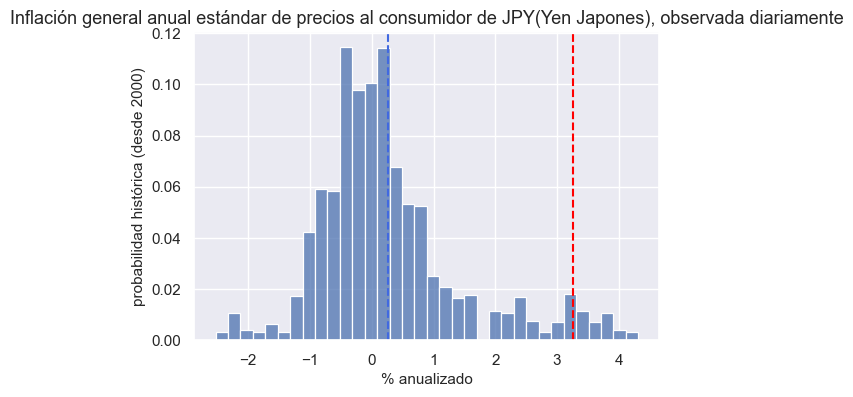

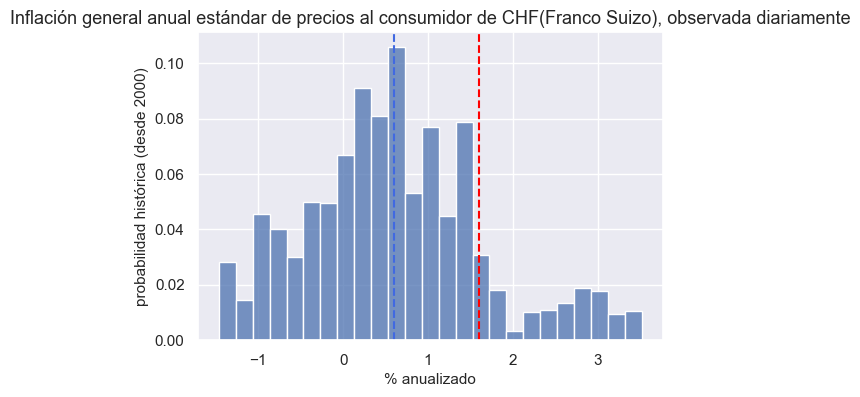

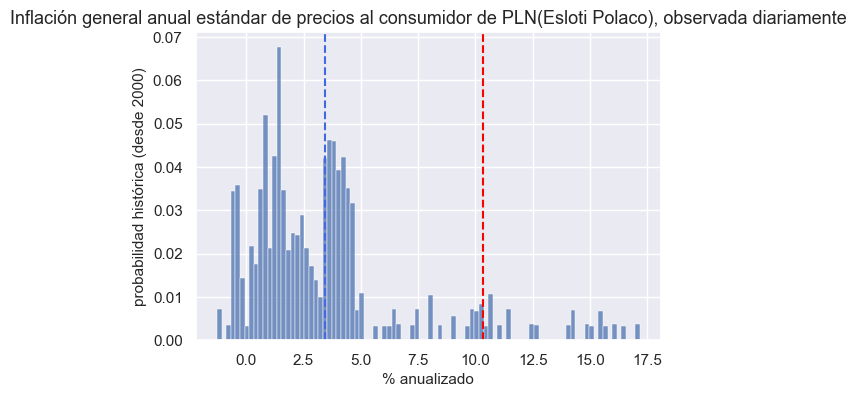

In [22]:
var = 'JPY_CPIH_SA_P1M1ML12'

col='royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)})  
sns.histplot(x = var, data=dfw, binwidth=0.2, stat = 'probability') #histograma de probabilidad y ancho de contenedor preestablecidas
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  #añadir línea vertical para la media
plt.axvline(x= dfw[var].dropna().iloc[-1], color='red', linestyle='--')

plt.title('Inflación general anual estándar de precios al consumidor de JPY(Yen Japones), observada diariamente', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad histórica (desde 2000)', fontsize=11) 
plt.show()

var = 'CHF_CPIH_SA_P1M1ML12'

col='royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)})  
sns.histplot(x = var, data=dfw, binwidth=0.2, stat = 'probability') #histograma de probabilidad y ancho de contenedor preestablecidas
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  #añadir línea vertical para la media
plt.axvline(x= dfw[var].dropna().iloc[-1], color='red', linestyle='--')

plt.title('Inflación general anual estándar de precios al consumidor de CHF(Franco Suizo), observada diariamente', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad histórica (desde 2000)', fontsize=11) 
plt.show()

var = 'PLN_CPIH_SA_P1M1ML12'

col='royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)})  
sns.histplot(x = var, data=dfw, binwidth=0.2, stat = 'probability') #histograma de probabilidad y ancho de contenedor preestablecidas
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  #añadir línea vertical para la media
plt.axvline(x= dfw[var].dropna().iloc[-1], color='red', linestyle='--')

plt.title('Inflación general anual estándar de precios al consumidor de PLN(Esloti Polaco), observada diariamente', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad histórica (desde 2000)', fontsize=11) 
plt.show()

Como se venía manejando, el Yen Japonés es afectado en gran medida por la deflación que presenta la economía Japones, el ciclo continuo de una baja demanda de bienes y servicios que promueve la baja continua de los precios. El Franco Suizo por otro lado maneja una inflación moderada, demostrando la estabilidad de la moneda y el manejo continuo de la inflación por parte del banco central suizo. Por otro la do el Esloti Polaco se ve afectado por una relativa mayor inflación y sobre todo más variabilidad en el indicador, mostrando las facilidades y problemas que puede acarrear el manejo independiente de la moneda y las oportunidades económicas que esto crea.

Nos gustaría presentar un gráfico que compare las distribuciones reales de carry forward de divisas entre las monedas seleccionadas en tu investigación.

Nos gustaría mostrar un gráfico que represente la distribución real del carry forward de divisas entre las monedas seleccionadas en tu investigación.

¿Podrías explicar qué interpretas del gráfico?

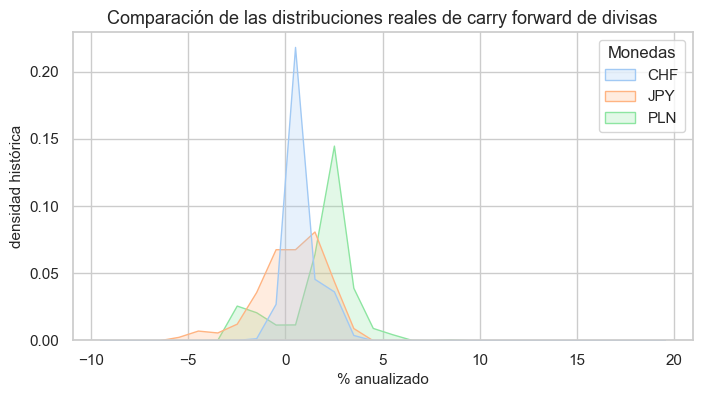

In [23]:
cids_sel =  ['JPY', 'CHF', 'PLN']
filt1 = df['xcat'] == 'FXCRR_NSA'
filt2 = df['cid'].isin(cids_sel)  # elegir secciones transversales
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01') 
dfx = df[filt1 & filt2 & filt3][['value', 'cid']].replace(0, np.nan)

colors = 'pastel'  # choose color palette
sns.set_theme(style='whitegrid', rc={'figure.figsize':(8, 4)})
ax = sns.histplot(x='value', data=dfx,  
             hue='cid', element='poly', multiple='layer', 
             binrange=(-10, 20), binwidth = 1, stat='density', palette=colors)
plt.title('Comparación de las distribuciones reales de carry forward de divisas', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)  
plt.ylabel('densidad histórica', fontsize=11)
leg = ax.axes.get_legend()
leg.set_title('Monedas')
plt.show()

Por otro lado, para estrategias de carry foward, se observa que, debido a las tasas de interés más elevadas, el Esloti Polaco es el que mejor rentabilidad a largo plazo genera, por lo tanto, estrategias de endeudarse en monedas como el Franco o el Yen para la compra de Esloti generan los mejores retorno. Justamente por las bajas tasas japonesas y el proceso de deflación hace más estable pero mucho menos rentable el proceso.

In [ ]:
colors = 'bone'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(8, 4)})
ax = sns.histplot(x='value', data=dfx,  
             hue='cid', element='bars', multiple='stack', 
             binrange=(-10, 20), binwidth = 0.5, stat='count', palette=colors)

plt.title('Distribución real del carry forward de divisas: contribución de las divisas', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)  # set x-axis label
plt.ylabel('días observados', fontsize=11)  # set y-axis label
leg = ax.axes.get_legend()  # add legend box to plot to identify cross-sections
leg.set_title('Currencies')  # give title to legend box
plt.show()

Nos gustaría presentar un gráfico que ilustre la expansión del crédito privado de los bancos, ajustada al salto, como porcentaje del PIB en un año, entre las monedas seleccionadas en tu investigación.

Por favor, ¿puedes explicar qué interpretas del gráfico?

In [ ]:
cids_sel = 
filt1 = df['xcat'] == 
filt2 = df['cid'].isin(cids_sel)  # elegir secciones transversales
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio
dfx = df[filt1 & filt2 & filt3]
dfw = dfx.pivot(index=['real_date'], columns='cid', values='value')  # pivotar el marco de datos a la escala de tiempo común

colors='tab10'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
ax = sns.lineplot(data=dfw, estimator=None, palette=colors, linewidth=1) 

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Expansión del crédito privado de los bancos, ajustada al salto, como % del PIB en 1 año', fontsize=13) 
plt.xlabel('')  # set x-axis label
plt.ylabel('% 6 meses sobre 6 meses, anualizado', fontsize=11) 

leg = ax.axes.get_legend() 
leg.set_title('Áreas monetarias')  

plt.show()

Nos gustaría presentar un gráfico que represente la carry real de divisas en los mercados emergentes: media mensual y 95 % de confianza entre las monedas seleccionadas en tu investigación.

Por favor, ¿podrías explicar qué interpretas del gráfico?

In [ ]:
cids_sel = 
filt1 = df['xcat'] ==
filt2 = df['cid'].isin(cids_sel)  # elegir secciones transversales
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio

dfx = df[filt1 & filt2 & filt3]
dfm = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').mean()['value'].reset_index()  # convertir a promedios mensuales
dfw = dfm.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()  # pivotar al índice apropiado

colors='Paired'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.lineplot(data=dfw, x='real_date', y='FXCRR_NSA', estimator='mean', errorbar=('ci', 95))  #trazar la media y su intervalo de confianza del 95%

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Carry real de divisas en los mercados emergentes: media mensual y 95 % de confianza', fontsize=13)
plt.xlabel('')  # set x-axis label
plt.ylabel('% anualizado', fontsize=11)  # set y-axis label

plt.show()

Nos gustaría presentar un gráfico que represente la rentabilidad de las divisas de mercados emergentes a lo largo de los meses, mostrando la media y el 95 % de confianza entre las monedas seleccionadas en tu investigación.

Por favor, ¿podrías explicar qué interpretas del gráfico?

In [ ]:

xcat_sel = 

filt1 = df['xcat'] == xcat_sel
filt2 = df['cid'].isin(cids_sel) 
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio
dfx = df[filt1 & filt2 & filt3]

dfm = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').sum()['value'].reset_index()  # medios mensuales
dfw = dfm.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()
dfw['month'] = dfw['real_date'].dt.month
dfw['period'] = 'Antes 2013'
dfw.loc[dfw['real_date'].dt.year > 2013, 'period'] = 'Despues 2013'

colors='Set2' 
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)}) 
ax = sns.lineplot(data=dfw, x='month', y=xcat_sel, hue='period', 
                  estimator='mean', errorbar=('ci', 95), palette=colors) 

plt.axhline(y=0, color='black', linestyle='--', lw=1) 
plt.title('Rentabilidad de las divisas de mercados emergentes a lo largo de los meses: media y 95% de confianza', fontsize=13) 
plt.xlabel('') 
plt.ylabel('%', fontsize=11) 
leg = ax.axes.get_legend() 
leg.set_title('Periodos')  

plt.show()

Nos gustaría presentar un gráfico que represente el crecimiento intuitivo del PIB real, expresado como el porcentaje de acarreo de oya y divisas entre las monedas seleccionadas en tu investigación.

¿Podrías explicar qué interpretas del gráfico?

In [ ]:
xcats_sel = 
filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2005-01-01')  
dfx = df[filt1 & filt2 & filt3]

colors=['steelblue', 'black']  
sns.set_theme(style='whitegrid', palette=colors) 
fg = sns.FacetGrid(dfx, col='cid', col_wrap=3, 
                   palette=colors, hue='xcat', hue_order=xcats_sel,  
                   height=3, aspect=1.5,  
                   sharey=False)  
fg.map_dataframe(sns.lineplot, x='real_date', y='value', errorbar=None, lw=1)  
fg.map(plt.axhline, y=0, c=".5", lw=0.75) 

fg.set_axis_labels('', '% ar')  
fg.set_titles(col_template='{col_name}')  
fg.fig.suptitle('Crecimiento intuitivo del PIB real: % de acarreo de oya y divisas', y=1)

name_to_color = {' Crecimiento intuitivo del PIB real: % oya': colors[0], 'transporte de divisas': colors[1]} 
patches = [mpl.patches.Patch(color=v, label=k) for k,v in name_to_color.items()] 
labels = name_to_color.keys() # series labels for legend box
fg.fig.legend(handles=patches, labels=labels, loc='lower center', ncol=2)

plt.show()

<h1>Modelo de Forecast</h1>

Nos gustaría presentar un gráfico que represente la inflación subyacente y la rentabilidad de los índices bursátiles (trimestral) para las monedas seleccionadas en tu investigación.

¿Podrías explicar qué interpretas del gráfico?

In [ ]:
xcats_sel = 
filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2000-01-01')
dfx = df[filt1 & filt2 & filt3]
dff = dfx.groupby(['cid', 'xcat']).resample('Q', on='real_date').mean()['value'].reset_index()
dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)}) 
sns.regplot(x=xcats_sel[0], y=xcats_sel[1], data=dfw, ci=98, order=1, 
            robust=False,  
            scatter_kws={'s': 20, 'alpha': 0.3, 'color':'lightgray'},
            line_kws={'lw' : 2, 'linestyle': '-.', 'color': 'salmon'}) 

plt.axhline(y=0, color='black', linestyle='--', lw=1) 
plt.axvline(x=0, color='black', linestyle='--', lw=1) 

plt.title('Inflación subyacente y rentabilidad de los índices bursátiles (trimestral)', fontsize=13)
plt.xlabel('IPC subyacente, %6/6m ar', fontsize=11)
plt.ylabel('Rentabilidad promedio diaria del índice de acciones, %', fontsize=11)

plt.show()

Nos gustaría presentar un gráfico que represente el carry forward de divisas y los rendimientos posteriores (promedios trimestrales) para las monedas seleccionadas en tu investigación.

¿Podrías explicar qué interpretas del gráfico?

In [ ]:

xcats_sel = 
filt1 = df['xcat'].isin(xcats_sel)
dfx = df[filt1 & filt2 & filt3] 
dff = dfx.groupby(['cid', 'xcat']).resample('Q', on='real_date').mean()['value'].reset_index() 
filt4 = dff['xcat']==xcats_sel[0]
dff.loc[filt4, 'value'] = dff[filt4].groupby(['cid', 'xcat'])['value'].shift(1)
dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)})
sns.regplot(x=xcats_sel[0], y=xcats_sel[1], data=dfw, ci=95,  
            order=2, 
            scatter_kws={'s': 20, 'alpha': 0.3, 'color':'goldenrod'}, 
            line_kws={'lw' : 1, 'linestyle': '-', 'color': 'tab:blue'}) 

plt.axhline(y=0, color='tab:blue', linestyle='--', lw=1)
plt.axvline(x=0, color='tab:blue', linestyle='--', lw=1)

plt.title('Carry forward de divisas y rendimientos posteriores (promedios trimestrales)', fontsize=13)
plt.xlabel('Real forward carry, % ar', fontsize=11)
plt.ylabel('Rentabilidades a plazo de divisas, % ar', fontsize=11)

plt.show()

Nos gustaría presentar un gráfico que represente el carry forward real de divisas (promedios mensuales) y el rendimiento real del IRS para las monedas seleccionadas en tu investigación.

Por favor, ¿podrías explicar qué interpretas del gráfico?

In [ ]:

xcats_sel = 
filt1 = df['xcat'].isin(xcats_sel)

dfx = df[filt1 & filt2 & filt3]
dff = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').mean()['value'].reset_index()
dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.regplot(x=xcats_sel[0], y=xcats_sel[1], data=dfw, 
            lowess=True,  
            marker='d', 
            scatter_kws={'s': 50, 'alpha': 0.2, 'color':'gray'},
            line_kws={'lw' : 1.5, 'color': 'black'}) 

plt.axhline(y=0, color='red', linestyle='--', lw=1)
plt.axvline(x=0, color='red', linestyle='--', lw=1)

plt.title('Carry forward real de divisas (promedios mensuales) y rendimiento real del IRS', fontsize=13)
plt.xlabel('Carry forward de divisas reales', fontsize=11)
plt.ylabel('Rendimiento real del IRS', fontsize=11)

plt.show()

Nos gustaría presentar un gráfico que muestre el Suavizado Exponencial Simple en tres modelos para las monedas seleccionadas en tu investigación.

¿Podrías explicar qué interpretas del gráfico?

In [ ]:
cids_sel = 
xcat_sel = 

filt1 = df['xcat'] == xcat_sel
filt2 = df['cid'].isin(cids_sel) 
filt3 = df['real_date'] >= pd.to_datetime('2002-01-01')

dfx = df[filt1 & filt2 & filt3]


In [ ]:
alpha_003 = 0.03
alpha_013 = 0.13

dfw = dfx.pivot_table(index="real_date", columns="cid", values="value").replace(
    0, np.nan
)  # amplia serie temporal df

dfema = pd.DataFrame(columns=["cid", "xcat", "real_date", "value"])

for cid in cids_sel:

    ema003 = SimpleExpSmoothing(
        dfw[cid].dropna(), initialization_method="heuristic"
    ).fit(smoothing_level=alpha_003, optimized=False)

    ema013 = SimpleExpSmoothing(
        dfw[cid].dropna(), initialization_method="heuristic"
    ).fit(smoothing_level=alpha_013, optimized=False)

    emaop = SimpleExpSmoothing(
        dfw[cid].dropna(), initialization_method="estimated"
    ).fit()

    df003 = ema003.fittedvalues.to_frame().reset_index().rename(columns={0: "value"})
    df003["xcat"] = xcat_sel + "_EMA003"

    df013 = ema013.fittedvalues.to_frame().reset_index().rename(columns={0: "value"})
    df013["xcat"] = xcat_sel + "_EMA013"

    dfop = emaop.fittedvalues.to_frame().reset_index().rename(columns={0: "value"})
    dfop["xcat"] = xcat_sel + "_EMAOP"
    Opt_alpha = emaop.params["smoothing_level"].round(4)

    dfc = pd.concat([df003, df013, dfop])

    dfc["cid"] = cid
    dfc = dfc[list(dfema.columns)]
    dfema = dfema.append(dfc)


dfx["xcat"] = xcat_sel
dfema = dfema.append(dfx[list(dfema.columns)])

dfemx = dfema[dfema["real_date"] >= pd.to_datetime("2021-01-01")]

xcats_ema = [xcat_sel + x for x in ["", "_EMA003", "_EMA013", "_EMAOP"]]
colors = ["black", "steelblue", "red", "yellow"]


sns.set_theme(style="whitegrid", palette=colors)
fg = sns.FacetGrid(
    dfemx,
    col="cid",
    col_wrap=1,
    palette=colors,
    hue="xcat",
    hue_order=xcats_ema,
    height=4,
    aspect=2.5, 
    sharey=False,
) 

fg.map_dataframe(
    sns.lineplot, x="real_date", y="value", errorbar=None, lw=1
) 

fg.set_axis_labels("", "% ")  
fg.set_titles(col_template="{col_name}") 
fg.fig.suptitle(
    f"Suavizado exponencial simple {xcat_sel}", y=1.02
)  

name_to_color = {
    "tasa de interés real a 5 años": colors[0],
    f"alpha= {alpha_003}": colors[1],
    f"alpha= {alpha_013}": colors[2],
    "alfa optimizado": colors[3],
}

patches = [
    mpl.patches.Patch(color=v, label=k) for k, v in name_to_color.items()
] 
labels = name_to_color.keys()  
fg.fig.legend(
    handles=patches, labels=labels, loc="lower center", ncol=2
)  

fg.fig.subplots_adjust(bottom=0.15) 
plt.show()

Nos gustaría presentar un gráfico que represente las rentabilidades futuras del índice bursátil, junto con series antiguas optimizadas y suavizadas para las monedas seleccionadas en tu investigación.

¿Podrías explicar qué interpretas del gráfico?

In [ ]:
filt1 = df["xcat"] == 
filt2 = df["cid"] == 
dfx = (
    df[filt1 & filt2].loc[:, ["real_date", "value"]].dropna().set_index("real_date")
).rename(
    columns={"value": "EQXR_VT10"}
)  # serie temporal df
dfx.index = pd.to_datetime(dfx.index)
dfx = dfx[pd.Timestamp("2020-01-01") :]


np.diff(np.array(dfx.index.month))

month_end = list(np.diff(np.array(dfx.index.month)) != 0) + [True]

# contar cuántos fines de mes tenemos en el marco de datos diario
count_month_end = sum(month_end)
dfxo = dfx.copy().replace(to_replace=0, method="bfill")

# 1. definir el período de tiempo diario inicial hasta el final del segundo mes completo
dfema = dfx.loc[
    : dfx.loc[
        month_end,
    ].index[1]
]

# 2. aplicar suavizado de exp simple optimizado al período de tiempo inicial
emaop = SimpleExpSmoothing(dfema.dropna(), initialization_method="estimated").fit()
Opt_alpha = emaop.params["smoothing_level"]

# 3. rellenar el marco de datos del marcador de posición con nuevos valores
dfxo["smoothened_value"] = emaop.fittedvalues.to_frame()

# 4. Aplicar una lógica similar al resto de la serie de datos mediante un bucle.:


for i in range(1, count_month_end - 1):
    dfema1 = dfxo["EQXR_VT10"].loc[
        dfx.loc[
            month_end,
        ]
        .index[i - 1] : dfx.loc[
            month_end,
        ]
        .index[i]
    ]

    emaop1 = SimpleExpSmoothing(dfema1, initialization_method="heuristic").fit(
        smoothing_level=Opt_alpha, optimized=False
    )

    dfop1 = emaop1.fittedvalues.to_frame()

    dfxo.loc[dfxo.index.isin(dfop1.index), ["smoothened_value"]] = dfop1[[0]].values

    dfema2 = dfxo["EQXR_VT10"].loc[
        : dfx.loc[
            month_end,
        ].index[i - 1]
    ]

    emaop1 = SimpleExpSmoothing(dfema2, initialization_method="estimated").fit()
    Opt_alpha = emaop1.params["smoothing_level"]


sns.set(rc={"figure.figsize": (15, 5)})

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(
    data=dfxo,
    x="real_date",
    y="EQXR_VT10",
    label="Rendimientos futuros del índice de acciones, diario",
    ax=ax,
)
sns.lineplot(
    data=dfxo,
    x="real_date",
    y="smoothened_value",
    label="Suavizado vintage: utilizando alfa optimizado de meses anteriores",
    ax=ax,
)
plt.title("Rentabilidades futuras del índice bursátil y series antiguas optimizadas y suavizadas ")

plt.plot(dfxo)


<h1>Discusión y Conclusión</h1>

Presenta tus conclusiones sobre el trabajo llevado a cabo

<h1>Referencia</h1>
